# 1. Carga de archivos

In [1]:
# Librerías
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilos
sns.set(style='whitegrid')

In [2]:
# Funciones
%run 00_functions.ipynb

In [3]:
# Crea una lista de los nombres de los archivos que existen en la carpeta data
ruta_archivos = Path("../data/raw")
archivos = [archivo for archivo in ruta_archivos.iterdir()]

In [4]:
# Se valida las columnas de los archivos
validador_de_columnas(archivos)

Los archivos tienen columnas diferentes
Columnas comunes:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
Archivos con columnas diferentes
hyundi.csv:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax($)', 'mpg', 'engineSize']


In [5]:
# Leer y concatena todos los archivos
columnas_seleccionadas = pd.read_csv(archivos[0])
columnas_seleccionadas = columnas_seleccionadas.columns # Se seleccionan las columnas

df = [pd.read_csv(archivo, header= None, skiprows=1) for archivo in archivos] # Se leen los archivos omitiendo la fila 1 y se indica que no hay encabezados
df = pd.concat(df, ignore_index=True) # Concatena los dataframe
df.columns = columnas_seleccionadas # Se agregan los encabezados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.8+ MB


# 2. Análisis exploratorio

In [6]:
# Contar la cantidad de autos por modelo
df_cantidad_modelos = df['model'].value_counts().reset_index()
df_cantidad_modelos

,model,count
0,Fiesta,6557
1,Golf,4863
2,Focus,4588
3,C Class,3747
4,Corsa,3441
...,...,...
190,Ranger,1
191,200,1
192,A2,1
193,RS7,1


In [7]:
# Se define trabajar con los 12 autos con más registros
top_12_cantidad = df['model'].value_counts().head(12).index
df = df[df['model'].isin(top_12_cantidad)].reset_index(drop=True)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,3 Series,2017,16500,Manual,16570,Diesel,125,58.9,2.0
1,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0
2,3 Series,2017,16000,Automatic,45456,Diesel,30,64.2,2.0
3,3 Series,2015,12600,Automatic,78957,Diesel,30,62.8,2.0
4,3 Series,2016,15100,Automatic,29213,Diesel,30,64.2,2.0


<Axes: >

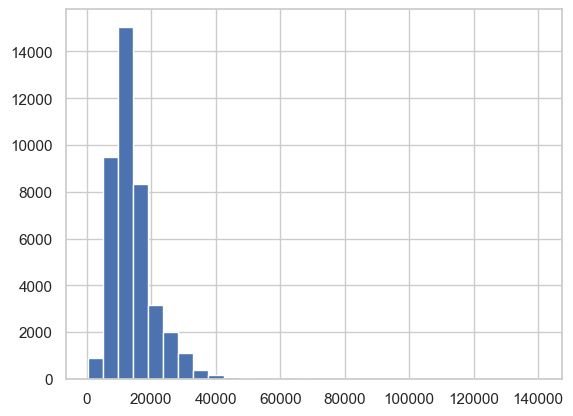

In [8]:
# Distribución de la variable a predecir
df.price.hist(bins=30)

In [9]:
# Valores mínimos y máximos
print(f'Mínimo: {df.price.min()}')
print(f'Máximo: {df.price.max()}')

# Autos con price por encima de 60000 y 120000
price_mayor_60 = df[df.price > 50000]
print(f'Cantidad de autos con precio mayor a 50 mil: {price_mayor_60.shape[0]}')

price_mayor_120 = df[df.price > 60000]
print(f'Cantidad de autos con precio mayor a 100 mil: {price_mayor_120.shape[0]}')

Mínimo: 450
Máximo: 140319
Cantidad de autos con precio mayor a 50 mil: 78
Cantidad de autos con precio mayor a 100 mil: 60


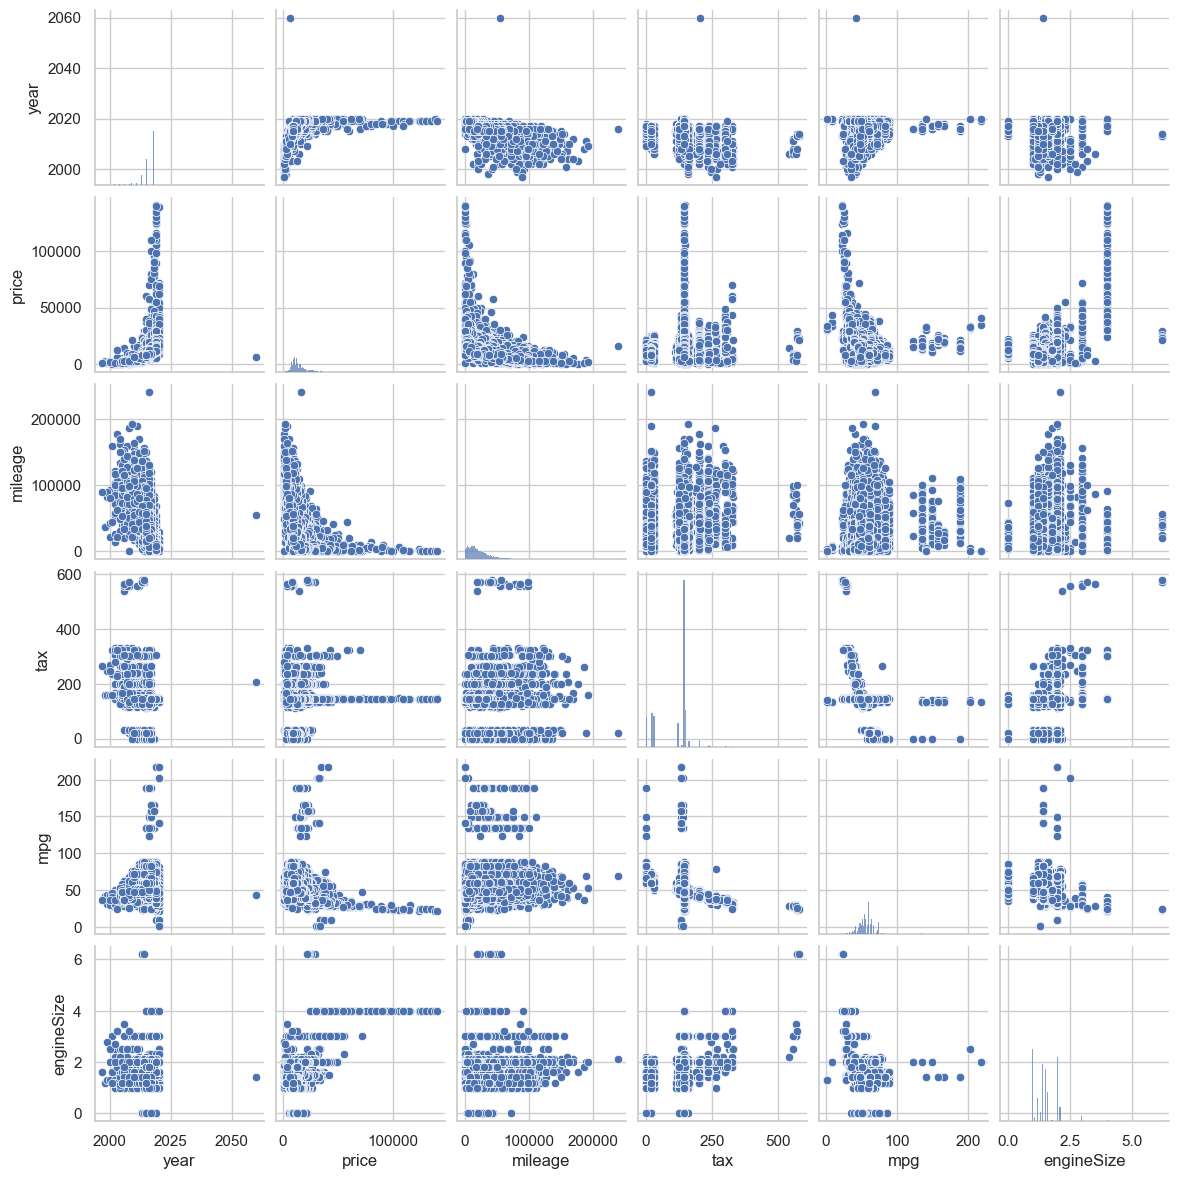

In [10]:
# Correlaciones de las variables numéricas
sns.pairplot(df, height=2)
plt.show();

<Axes: >

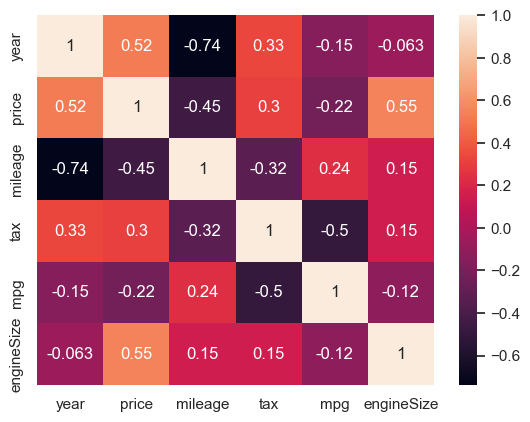

In [11]:
# Heatmap
columnas_numericas = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
matriz_correlacion = df[columnas_numericas].corr()
sns.heatmap(matriz_correlacion, annot=True)

In [12]:
# Registros únicos para cada columna categórica
columnas_categoricas = ['model', 'transmission', 'fuelType']
for columna in columnas_categoricas:
    print(f'Registros únicos en columna {columna}\n', df[columna].unique())

Registros únicos en columna model
 [' 3 Series' ' Fiesta' ' Focus' ' Kuga' ' A Class' ' C Class' ' Yaris'
 ' Corsa' ' Astra' ' Mokka X' ' Golf' ' Polo']
Registros únicos en columna transmission
 ['Manual' 'Automatic' 'Semi-Auto' 'Other']
Registros únicos en columna fuelType
 ['Diesel' 'Other' 'Petrol' 'Hybrid']


In [13]:
# Guardar los datos procesados en un archivo csv
df.to_csv('../data/processed/top_12_carros_vendidos.csv', index=False)